# Statistics 

[Scipy](https://www.scipy.org/) is python package built on Numpy for scientific computing. Scipy has multiple sub-packages for optimization, linear algebra, image processing, statistics, etc. This notebook will concentrate on the Scipy’s statistics sub-package to review important statistics concepts we will encounter in data science projects.  

## stats package - take normal distribution as an example

In [0]:
#import scipy 
import scipy as sp

#import numpy for matrix operations
import numpy as np 

#matplotlib library is for drawing diagrams 
import matplotlib.pyplot as plt 
#make sure the display is set as inline so we can see the diagram/chart in notebook
%matplotlib inline 

#we can import normal distribute from a sub-package of scipy
from scipy.stats import norm

In [3]:
#let's generate 10000 random data points 
#using randn() with mean of 0 and standard deviation of 1
number_of_data_points = 10000
random_data_set = sp.randn(number_of_data_points)
type(random_data_set)

numpy.ndarray

In [0]:
random_data_set.mean()  #sample size determine the closeness to 0

In [0]:
sp.median(random_data_set)

In [0]:
min_max = np.array([random_data_set.min(), random_data_set.max()])
min_max

In [0]:
spread_measures = np.array([sp.std(random_data_set), sp.var(random_data_set)])
spread_measures

In [0]:
#describe() contains most of the properties of the distribution
sp.stats.describe(random_data_set)

In [0]:
iq_mean=100  
iq_std_dev = 15
iq_distribution = norm(loc=iq_mean, scale=iq_std_dev)   #generate dataset from mean and std_dev
for n in np.arange(10):  #take 10 outputs from this distribution
    #.rvs() random variable of given type    
    print('{:6.2f}'.format(iq_distribution.rvs()))  #learn the formated output

## Discrete vs. Countinous Distributions

keywords: Discrete Distribution; Countinuous Distribution; 
          Uniform, Normal, Poisson Disribution 
          Probability Density Function; Cumulative Density Function; Probability Mass Function

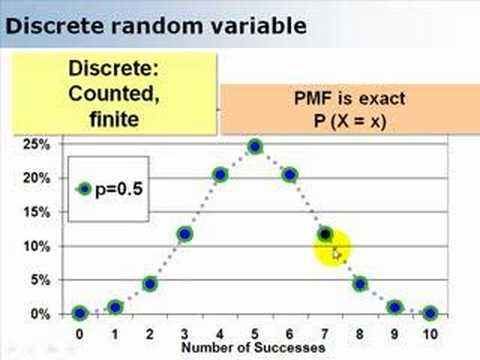

In [10]:
#Now, let's look at discrete and countinous distributions

#This Youtube video is a good introduction to 
#random variable distribution.

from IPython.display import YouTubeVideo
YouTubeVideo("1xQ4r2gcW3c")

[0.57863426 0.34726388 0.06946945 0.00463241 0.         0.
 0.         0.        ]
[0 1 2 3 4 5 6 7]


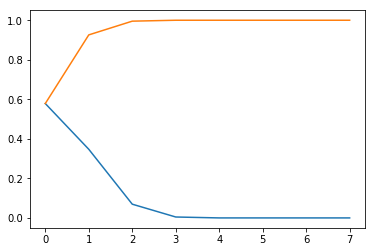

In [11]:
#Binomial is discrete distribution 
#Let's simulate a die roll
x = np.arange(8)
#we can use pmf() to calculate probability mass function
#you will notice that binomial distribution doesn't have pdf()
pmf = sp.stats.binom.pmf(x,3,0.1667)
#cdf() to calculate cumulative distribution function
cdf = sp.stats.binom.cdf(x,3,0.1667)
print(pmf)
print(x)

#Let's draw the diagram
import pylab
pylab.plot(x,pmf)
pylab.plot(x,cdf)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


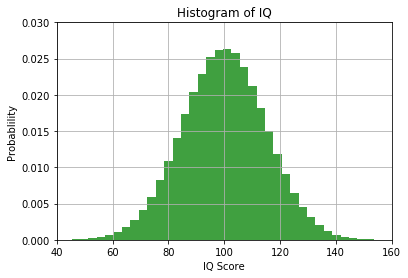

In [12]:
#let's visualize normal distribution 
#Review Normal Distributuion @ 
#https://en.wikipedia.org/wiki/Normal_distribution 

mu, sigma = 100, 15
#method 1 using randn
#data_set = mu+sigma*np.random.randn(10000)

#method 2 using normal(mu, sigma, number_of_samples)
data_set = np.random.normal(mu, sigma, 1000000)

#distribute data into 50 bins to see a histogram
n,bins,pathes = plt.hist(data_set, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('IQ Score')
plt.ylabel('Probablility')
plt.title('Histogram of IQ')
# plt.text(60, 0.25, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


In [0]:
#use scipy to create and plot normal distribution based on mean and std
from scipy import stats
mean, std =100, 15
X =np.arange(50,150,0.1) #use the range bigger than 3 x std
Y=stats.norm.pdf(X,mean,std)

In [0]:
#plot the pdf
plt.plot(X,Y)


In [0]:
#show CDF
Z=stats.norm.cdf(X,mean,std)
plt.plot(X,Z)

In [0]:
#now, let's put CDF and PDF in the same diagram. 
#do a little research and explain the relationship between CDF and PDF using this diagram
plt.plot(X,Y)
plt.plot(X,Z)

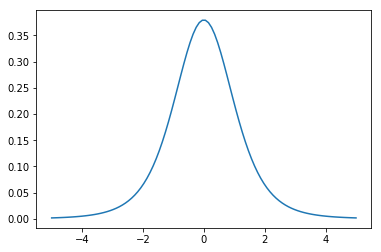

In [17]:
# T-distribution (N<30) student distribution 
from scipy.stats import t

x=np.linspace(-5,5,100)
rv = t(5)
plt.plot(x,rv.pdf(x))

## Exercise: Draw a diagram to demonstrate when T-distrubtion reaches and match normal distribution  

In [0]:
#t(20) is closer to normal distribution, t(30) looks the same

x=np.linspace(-10,10,1000)
rv = t(20)
rv2 = t(3)
plt.plot(x,rv.pdf(x), 'g')
plt.plot(x,rv2.pdf(x), 'r')
y=stats.norm.pdf(x,0,1)
plt.plot(x,y, 'b')

In [0]:
#poisson distribution

#The average IQ is 100. What's the chance of the next tester's IQ is exactly 99
mu = 100
p = sp.stats.poisson.pmf(99,mu)
print(p)

#what does the pmf look like?
x=range(50,150)
p = sp.stats.poisson.pmf(x,mu)
plt.bar(x,p)

In [0]:
#what does the cmf look like?
x=range(50,150)
p = sp.stats.poisson.cdf(x,mu)
plt.bar(x,p)

## Exercise: what's the chance that someone's IQ is higher than 120

## A/B Test

Discussion: What does pvalue here mean? 
            repeat the test multiple times, you would receive different p-values;
            some show that the two groups have significant difference, some don't.
            How about increase the sample size to 1000 or 10000?
            What is the result of sp.stats.ttest_ind(treamtment_iq, control_iq)?

In [22]:
#A/B Test
#Compare the means and variances of the control and treatment groups
#To reject the null hypothesis, we need big t-statistic and low p-value

#Treatment Group
control_iq_mean=100 
control_iq_std_dev = 15
control_iq = np.random.normal(control_iq_mean, control_iq_std_dev,100)

#Control Group
treatment_iq_mean=97  
treatment_iq_std_dev = 15
treamtment_iq = np.random.normal(treatment_iq_mean, treatment_iq_std_dev,100)

#A/B Ttest
sp.stats.ttest_ind(treamtment_iq, control_iq)



Ttest_indResult(statistic=-1.174986399398084, pvalue=0.24141123471464862)